# Testes de Hipóteses - Médias - com Exemplos


Os testes de hipótese fazem parte da estatística inferencial que é usada para formular conclusões e fazer inferências sobre as populações baseados em dados de amostras coletados em pesquisas.


## Fundamentos de testes de hipóteses

**-  Testes para uma população**

    - Teste para média
    - Teste para proporção
    - Teste para variância

**- Testes para comparar duas populaçôes**

    - Teste para duas médias
    - Teste para duas proporções
    - Teste para duas variâncias

**- Outros testes**

Simbolos:
- σ2 -> Variância

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

import scipy.stats as stats
from statsmodels.stats.weightstats import ztest

import pingouin as pg

from IPython.core.display import Image, display

plt.rcParams["figure.figsize"] = (10,5)
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_context('talk')

C:\Users\Windows10\AppData\Local\Temp\ipykernel_26368\3832885728.py:12: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import Image, display


In [2]:
# Quando for passada como parâmetro a seed
random_state = 1234
# Para uso com funções da biblioteca standard (ex random.randint)
random.seed(random_state)
# Para uso com funções da biblioteca numpy (ex np.random.randint)
np.random.seed(random_state)

In [3]:
# funções uteis
def check_hypotesis(p_value, alpha):
    if p_value<alpha:
        print("'Reject Null Hypothesis : Significant'")
    else:
        print("Do not reject Null Hypothesis : Not Significant")


## Testes de hipótese para **uma população**

Quando queremos fazer inferencia para um parametro de uma unica população

Exemplos:
- Testar se a **média** de altura dos estudantes de uma universidade é igual a 170 cm ($\mu$ = 170 de uma distribuição normal)
     - Testes para a **média** de uma população
         - $\sigma^2$ conhecido 
         - $\sigma^2$ desconhecido
     
- Testar se a **proporção** de peixes fêmeas em uma lagoa é de 50% (p=0.5 de uma distribuição Bernoulli)
    - Teste para a **proporção** de uma população
    
- Testar se a **variabilidade** do diâmetro de um lote de parafusos se mantém em torno de 0.02 mm ($\sigma$ = 0.02 de uma distribuição normal)
    - Teste para a **variância** de uma população

### Médias $\mu$ 

#### $\sigma^2$ conhecido

**Condições para o teste**

Quando temos os seguintes requisitos:
   - Temos uma amotra aleatoria
   - $\sigma^2$ é conhecido
   - A população tem distribuição normal ou n > 30

##### Exemplo 1: 

Enchimento de embalagens

- Uma máquina de encher embalagens de café está funcionando adequadamente se colocar 700g em cada embalagem
- Para verificar a calibração da máquina, foi coletada uma amostra de 40 embalagens, que resultou em uma média de 698g
- Sabe-se que o desvio-padrão do enchimento da máquina é de 10g

Teste a Hipótese de o peso médio das embalagens na população ser 700g, com um nível de significancia de 5%

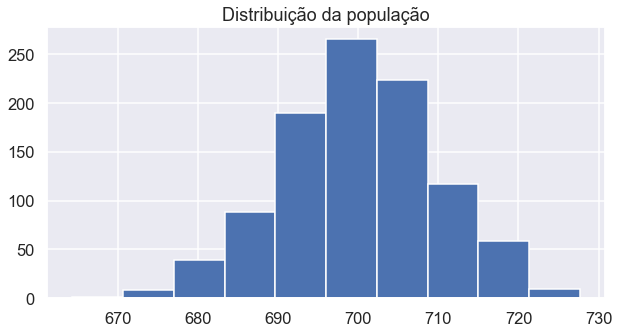

In [31]:
# definiçao dos parametros populacionais
pop_mean=700
pop_sd=10
pop_n = 1000 # suposiçao

# definiçaõ dos parametros amostrais
amostra_mean=698
amostra_n=40

# nivel de significancia
alpha=0.05

np.random.seed(random_state)
pop_embalagens=np.random.normal(loc=pop_mean, scale=pop_sd, size=pop_n)

plt.title("Distribuição da população")
plt.hist(pop_embalagens)
plt.show()

1 - Definir a hipotese nula (H0) e a alternativa (HA):

 **H~0~**: $\mu = 700$ <br>
 **H~A~**: $\mu \neq 700$
 
2 - Definir o nivel de significancia:

$\sigma$  = 0.05

3- Definir o tipo de teste, com base na hipotese alternativa: 
   
   - teste bilateral (nao interessa se vai estar acima ou abaixo da media, qualquer um dos dois é prejudicial)
  
4 - Calcular a estatistica de teste:

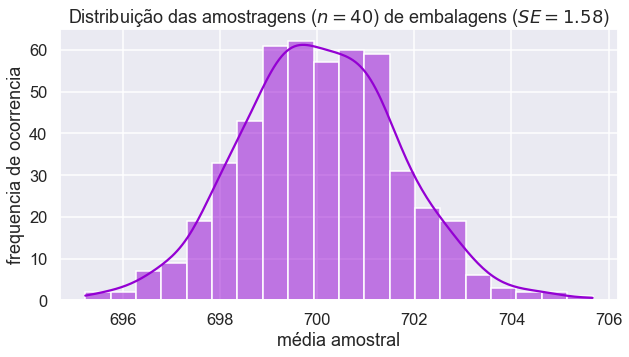

In [5]:
# Cria a distribuição de amostragem da população para poder comparar com amostra_mean.
# pega 40 samples aleatoriamente da população e calcula a media
sample_means = []
for sample in range(0, 500):
    sample_values = np.random.choice(a=pop_embalagens, size=amostra_n)    
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

# calcula o erro padrao da amostragem
standard_error_embalagens = pop_sd / np.sqrt(amostra_n)

# visualiza as medias das amostras
sns.histplot(sample_means, color='darkviolet', kde=True)
plt.title(f"Distribuição das amostragens ($n={amostra_n}$) de embalagens ($SE={standard_error_embalagens:0.3}$)")
plt.xlabel("média amostral")
plt.ylabel("frequencia de ocorrencia")
plt.show()

In [6]:
z_score = (amostra_mean - pop_mean)/standard_error_embalagens
z_score

-1.2649110640673518

5 - Determinar a região critica (região de rejeição), com base no nível de significancia 𝜎

In [7]:
#find Z critical value
z_critico = stats.norm.ppf(1-alpha/2) # RC

z_critico

1.959963984540054

O nível alfa inicial é 0,05 e este é um teste bicaudal. 

Vamos sombrear ambas as áreas da região crítica no lado positivo e negativo da distribuição de amostragem. 

O valor crítico de z correspondente é 1,96. 

Vamos encontrar o valor médio de embalagens associado a esse z-score no lado positivo e negativo

In [8]:
# lado negativo
alpha_05_positive = z_critico*standard_error_embalagens+pop_mean
# lado positivo
alpha_05_negative = -z_critico*standard_error_embalagens+pop_mean

print(alpha_05_positive, alpha_05_negative)

703.0989751615228 696.9010248384772


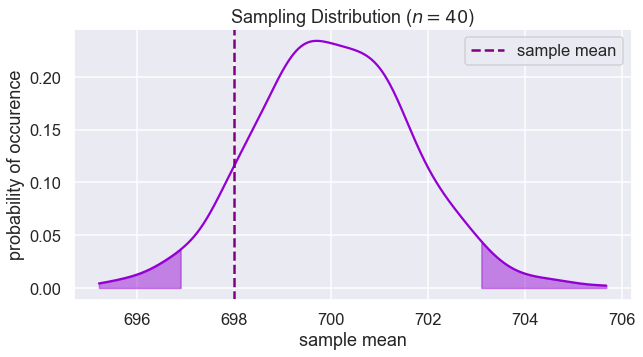

In [9]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means), 10000)
plt.plot(pos, kde(pos), color='darkviolet')

shade = np.linspace(alpha_05_positive, np.max(sample_means), 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='darkviolet')
shade2 = np.linspace(alpha_05_negative, np.min(sample_means), 300)
plt.fill_between(shade2, kde(shade2), alpha=0.45, color='darkviolet')

plt.axvline(x=amostra_mean, linestyle='--', linewidth=2.5, label="sample mean", c='purple')

plt.title(f"Sampling Distribution ($n={amostra_n}$)")
plt.xlabel("sample mean")
plt.ylabel("probability of occurence")
plt.legend()
plt.show()

C:\Users\Windows10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


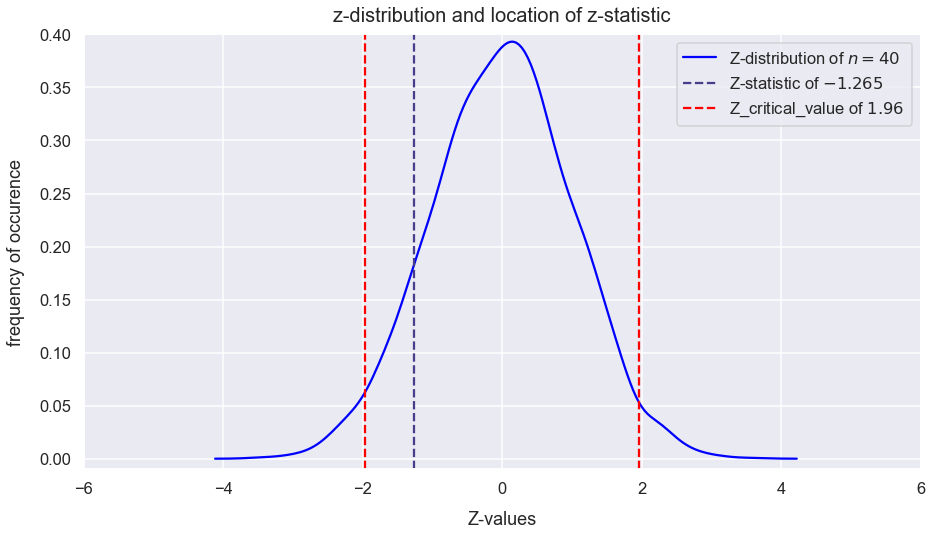

In [49]:
plt.figure(figsize=(15, 8))
np.random.seed(5)
z_distribution_df = np.random.normal(amostra_n, size=3000)
sns.distplot(stats.zscore(z_distribution_df), color='blue', hist=False, label=f'Z-distribution of $n={amostra_n}$')
plt.axvline(x=z_score, color='darkslateblue', linestyle='--', label=f"Z-statistic of ${round(z_score, 3)}$")
plt.axvline(x=-z_critico, color='red', linestyle='--', label=f"Z_critical_value of ${round(z_critico, 2)}$ ")
plt.axvline(x=abs(z_critico), color='red', linestyle='--',)
plt.xlabel("Z-values", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);
plt.title("z-distribution and location of z-statistic", y=1.015, fontsize=20)
plt.ylim(-.01, .4)
plt.xlim(-6, 6)
plt.legend();

A visualização mostra que `amostra_mean` **não** está na região critica.

Podemos calcular a probabilidade de selecionar aleatoriamente uma média de amostra maior que `amostra_mean` identificando a área sob a curva à direita do escore z da média da amostra em uma distribuição normal padrão. 
É o z-score em uma distribuição normal padrão.

In [10]:
p_value = stats.norm.sf(abs(z_score))*2  # multiplica por 2 pq é um teste bi-lateral
print('p-value' , p_value)

p-value 0.2059032107320684


6 - Conclusão

In [11]:
check_hypotesis(p_value, alpha)

Do not reject Null Hypothesis : Not Significant


o p-value é 0.206. O valor de alpha inicial foi de 0,05. O valor p é maior que o alpha.

O corte do z-score equivalente para cada cauda é ± 1,96. Acima, calculamos um valor do z-score de -1.26, que é menor do que 1,96.

Portanto, `amostra_mean` não é significativo em p < 0,05. Obtivemos evidência suficiente para não rejeitar a hipótese nula.

In [12]:
# usado funções prontas
# import statsmodels

# amostra_embalagens=np.random.normal(loc=amostra_mean, scale=pop_sd, size=amostra_n)

# ztest, pval = statsmodels.stats.weightstats.ztest(x1=amostra_embalagens, value=pop_mean)

# ztest, pval

#### $\sigma^2$ desconhecido

**Condições para o teste**

Quando temos os seguintes requisitos:
 - Temos uma amostra aleatoria
 - $\sigma^2$ é desconhecido
 - A população tem distribuição Normal ou n > 30.

OBS: aqui, quando n >30, o teste t fica muito parecido com o normal, entao n vai fazer tanta diferença usar a distribuição t ou a normal

##### Exemplo 1: 

Uso do cartão de crédito

- Um estudo foi idealizado para estimar a média anual dos débitos de cartão de crédito da população de famílias brasileiras. 
- Uma amostra de n = 15 famílias forneceu média de saldos de 5200,00 e o desvio padrão foi de R$ 3058,00.

1. Obtenha um intervalo com 95% de confiança.
2. Teste a hipótese de que a média anual de débitos é de R$ 6000 00, com o mesmo nível de confiança



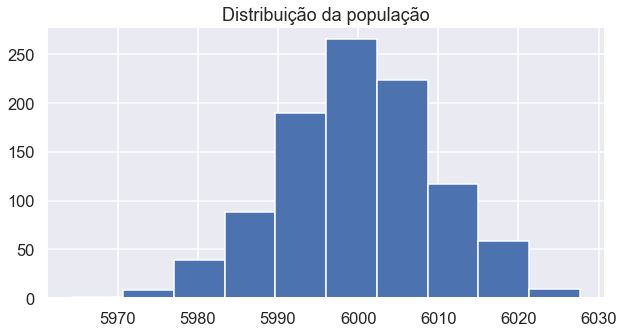

In [13]:
# definiçao dos parametros populacionais
pop_mean=6000
pop_n = 1000 # suposiçao

# definiçaõ dos parametros amostrais
amostra_mean=5200
amostra_sd=3058
amostra_n=15

# nivel de significancia
alpha=0.05

np.random.seed(random_state)
pop_uso_cartao=np.random.normal(loc=pop_mean, scale=pop_sd, size=pop_n)

plt.title("Distribuição da população")
plt.hist(pop_uso_cartao)
plt.show()

1 - Definir a hipotese nula (H0) e a alternativa (HA):

 **H~0~**: $\mu = 6000$ <br>
 **H~A~**: $\mu \neq 6000$
 
2 - Definir o nivel de significancia:

$\sigma$  = 0.05

3- Definir o tipo de teste, com base na hipotese alternativa: 
   
   - teste bilateral (nao interessa se vai estar acima ou abaixo da media, qualquer um dos dois é prejudicial)
  
4 - Calcular a estatistica de teste:

In [14]:
degrees_of_freedom = amostra_n-1
degrees_of_freedom

14

In [15]:
t_critical_value = round(stats.t.ppf(q=(alpha/2), df=degrees_of_freedom), 3) # RC
t_critical_value

-2.145

In [16]:
### nao consegui gerar uma amostra que segue os parametros estabelecidos, por isso o teste t nao da o resultado correto

# # simula amostra dos débitos de cartão de crédito da população de famílias brasileiras.

# amostra_uso_cartao=np.random.normal(loc=amostra_mean, scale=amostra_sd, size=amostra_n)
# # amostra_uso_cartao=amostra_uso_cartao[amostra_uso_cartao>0]
# # amostra_uso_cartao = np.random.choice(a=amostra_uso_cartao, size=amostra_n) # pega a quantidade de amostra que de fato queremos simular 

# plt.figure(figsize=(8,4))
# a = plt.hist(x=amostra_uso_cartao)
# plt.axvline(x=amostra_mean, color='r', linestyle='--', label = 'Media')
# plt.xlabel(r'$\bar{X}$', fontsize=20)
# plt.ylabel(r'$P(\bar{X})$', fontsize=20)
# plt.show()

In [27]:
# calcula t-test
numerator = amostra_mean-pop_mean
standard_error = amostra_sd/np.sqrt(amostra_n)
t_statistic = numerator/standard_error


p_value = stats.t.sf(abs(t_statistic), df=degrees_of_freedom)*2  # two-sided pvalue = Prob(abs(t)>tt)

print('t_statistic', round(t_statistic, 3))
print('p-value' , round(p_value,3))

t_statistic -1.013
p-value 0.328


In [19]:
# # calcula t-test
# t_statistic, p_value = stats.ttest_1samp(a=amostra_uso_cartao, popmean=pop_mean)

# t_statistic, p_value

In [ ]:
### nao consegui gerar uma amostra que segue os parametros estabelecidos, por isso o teste t nao da o resultado correto

# result = pg.ttest(x=amostra_uso_cartao, y=pop_mean, alternative='two-sided', confidence=(1-alpha))

# t_statistic = result['T'][0]
# p_value = result['p-val'][0]

# display(result)

C:\Users\Windows10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


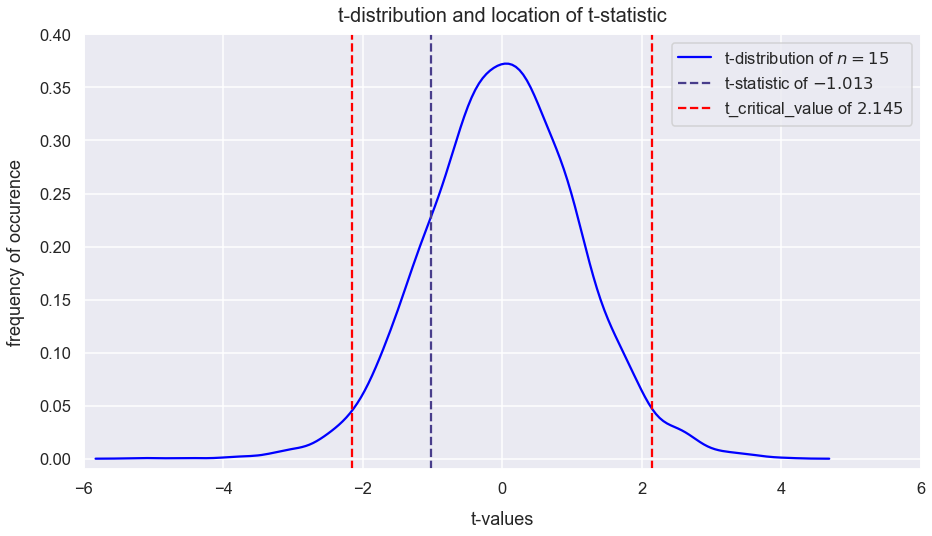

In [30]:
plt.figure(figsize=(15, 8))
np.random.seed(5)
t_distribution_df = np.random.standard_t(amostra_n, size=3000)
sns.distplot(t_distribution_df, color='blue', hist=False, label=f't-distribution of $n={amostra_n}$')
plt.axvline(x=t_statistic, color='darkslateblue', linestyle='--', label=f"t-statistic of ${round(t_statistic, 3)}$")
plt.axvline(x=t_critical_value, color='red', linestyle='--', label=f"t_critical_value of ${abs(t_critical_value)}$ ")
plt.axvline(x=abs(t_critical_value), color='red', linestyle='--',)
plt.xlabel("t-values", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);
plt.title("t-distribution and location of t-statistic", y=1.015, fontsize=20)
plt.ylim(-.01, .4)
plt.xlim(-6, 6)
plt.legend();

In [28]:
check_hypotesis(p_value, alpha)

Do not reject Null Hypothesis : Not Significant


Portanto, não existe evidência de que a média de débitos seja diferente de R$ 6000,00

##### Exemplo 2: 

fonte: https://medium.com/data-hackers/o-que-realmente-um-teste-de-hip%C3%B3teses-quer-nos-dizer-b82801b03529

- Segundo pesquisas de mercado, o salario de um cientista de dados é de 13,1 mil a  26,7 mil (média de 19.900)

Será que o salário de um cientista de dados é realmente esse?

**H~0~**: $\mu = 19.900$ <br>
**H~A~**: $\mu \neq 19.900$
 

In [ ]:
# parametros observados - populacao (aquilo que queremos ver se é verdade)
obs_mean=19.900
obs_std=np.std([13.1,26.7])

#  parametros amostrais
am_mean=6986.16
am_std=5062.87
am_n = 795

# nivel de significancia
alpha=0.05

# simula amotra de salarios (imagine q vc saiu perguntando o salario de todo mundo q era cientista, esses sao as valores conseguidos)
amostra_cientistas=np.random.normal(loc=am_mean, scale=am_std, size=10000) #10000 para depois depois selecionar somente os am_n positivos
amostra_cientistas = amostra_cientistas[(amostra_cientistas > 500) & (amostra_cientistas < 30000)] # apenas valores positivos dentro do range (n temos salarios negativos)
amostra_cientistas = np.random.choice(a=amostra_cientistas, size=am_n, ) # pega a quantidade de amostra que de fato queremos simular 

plt.figure(figsize=(8,4))
a = plt.hist(x=amostra_cientistas, bins=20, color='#0504aa', alpha=0.7, rwidth=0.85, label = str(am_n), density=True)
plt.axvline(x=am_mean, color='r', linestyle='--', label = 'Media')
plt.xlabel(r'$\bar{X}$', fontsize=20)
plt.ylabel(r'$P(\bar{X})$', fontsize=20)
plt.show()

In [ ]:
# calcula t-test

stat, p = stats.ttest_1samp(amostra_cientistas, popmean=obs_mean)

print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(2)))

Pela definição do p-valor, a probabilidade de encontrar na população um valor no mínimo tão extremo quanto a média amostral, dado que a hipótese nula é verdadeidera, é igual a zero (não zero absoluto, é bem próximo de zero na verdade).

Isso quer dizer que se a média salarial dos cientistas de dados fosse realmente R$19.900, a chance de nós encontrarmos uma amostra de salários com média igual a R$6.986,16 é praticamente zero. Isso quer dizer que nossa amostra é tão incomum que ela não pode ser real em um cenário que o salário médio de um cientista de dados é R$19.900.

In [ ]:
check_hypotesis(p, alpha)

Nossa amostra fornece evidências de que a hipótese nula não é verdadeira, nesse caso podemos `rejeitá-la`.

Então a média salarial de um cientista de dados é na verdade R$6.986,16?

Não. Esse é somente o valor da nossa média amostral. 

No teste de hipóteses, esse valor nos dá evidências de que é extremamente improvável que a média salarial de um cientista de dados é R$19.900. 

Mas isso não quer dizer que seja R$6.986,16.

## Testes de hipótese para **duas populações**

Quando queremos comparar parâmetros de duas populações

Exemplos:
- Testar se a **média** dos estudantes de uma universidade difere entre alunos e alunas ($\mu_M$ = $\mu_F$ de distribuições normais)
     - Testes para comparar **médias** de duas populações
         - $\sigma^2$ conhecidos 
         - $\sigma^2$ desconhecido(s) (pareadas/independentes; iguais/diferentes)
     
- Testar se as **proporções** de pacientes recuperados são distintas entre dois tratamentos ($P_1$ = $P_2$ de distribuições Bernoulli)
    - Teste para comparar duas **proporções**
    
- Testar se a **variabilidade** do diâmetro de parafusos difere entre dois fornecedores ($\sigma^2_1$ = $\sigma^2_2$ de duas distribuições normais)
    - Teste para comparar **variâncias** de uma população

## Proporções
 
 Os testes para proporções são utilizados quando temos duas variáveis em escala nominal ou ordinal. 

Eles visam responder as seguintes perguntas:

- A amostra é semelhante a população que a originou? A frequência observada de um evento em uma amostra é igual a frequência com que ele é esperado?
- As variáveis comparadas são independentes? Há associação entre as variáveis? Será que uma característica está associada com a ocorrência de certo evento?
- Será que diferentes amostras têm a mesma proporção de indivíduos com alguma característica?
- Após a aplicação de um tratamento, houve mudanças significativas de uma categoria para outra? Houve mudanças de uma característica ao longo do tempo

In [ ]:
display(Image(url='https://i1.wp.com/operdata.com.br/wp-content/uploads/2021/05/diagrama2-1.png?w=981&ssl=1', unconfined=True))

tsk

In [ ]:
import numpy as np
from statsmodels.stats.proportion import proportions_chisquare
import matplotlib.pyplot as plt

In [ ]:
rng = np.random.default_rng()

In [ ]:
n = 10000
p1 = 0.15
p2 = 0.153
s1 = rng.binomial(1, p1, n)
s2 = rng.binomial(1, p2, n)

In [ ]:
s1_avg = [rng.binomial(1, p1, n).mean() for i in range(50)]
s2_avg = [rng.binomial(1, p2, n).mean() for i in range(50)]

In [ ]:
plt.hist(s1_avg)
plt.hist(s2_avg);

In [ ]:
proportions_chisquare([s1.sum(), s2.sum()], [n, n])[1]

------- fim tsk

### Testes para uma amostra

Os testes para comparação de uma amostra é utilizado para verificar se uma determinada amostra vem de uma população especificada. Podem ser chamados de testes de aderência ou bondade do ajuste, uma vez que compara-se a distribuição amostral com a distribuição de interesse.

É importante para uma análise, uma vez que a semelhança da amostra com a população que a originou possibilita que os resultados da análise sejam mais fidedignos.

Há três testes para comparar proporção em uma amostra:

#### Teste Binomial

Para a realização do teste binomial é necessário que a variável seja **dicotômica**, ou seja, assuma apenas dois valores (categorias). **Seu intuito é verificar se a proporção de sucessos (presença de uma característica) observada na amostra (pˆ) pode pertencer a uma população com uma determinada proporção.**

Requisitos:
- Cada observação é classificada como sucesso (X = 1) ou fracasso (X = 0).
- As n tentativas são independentes.
- Cada tentativa tem probabilidade p de sucesso.

Estatítica de teste:
- Y = número de sucessos.

Hipóteses:

- H0 : p = p0
- H1 : p ≠ p0


- H0 : p = p0
- H1 : p < p0


- H0 : p = p0
- H1 : p > p0

#### Exemplo 1: 

Um industria textil afirma que seu processo de fabricação produz **95% de produtos dentro das especificações**. Deseja-se averiguar se este processo ainda está sob controle. **Uma amostra de 20 produtos foi analisada e foram constatadas 14 produtos dentro das especificações**. Ao nível de **5% de significância**, podemos afirmar que realmente o processo produz 95% de produtos dentro das especificações?

- H0 : p = 0,95
- H1 : p ≠ 0,95

In [ ]:
result = stats.binomtest(k=14, n=20, p=0.95, alternative='two-sided')

alpha = 0.05
print(f'pvalue = {result.pvalue}')

if result.pvalue < alpha:
    print("We Reject the Null Hypothesis.")
else:
    print("We Accept the Null Hypothesis.")
    
print(f'\nEstimated Proportion: {result.proportion_estimate}')


print(f'\nPercent confidence interval {result.proportion_ci(confidence_level=0.95)}')

#### Exemplo 2

Estima-se que cerca de 40% das mulheres que são submetidas à cirurgia do câncer de mama têm algum tipo de efeito após a cirúgia. Um novo método de cirurgia foi realizado em 18 pacientes e 4 tiveram algum efeito. Ao nível de 5% de significância, podemos afirmar que o novo método é eficiente na redução dos efeitos?

- H0 : p = 0,40
- H1 : p < 0,40

In [ ]:
result = stats.binomtest(k=4, n=18, p=0.4, alternative='less')

alpha = 0.05
print(f'pvalue = {result.pvalue}')

if result.pvalue < alpha:
    print("We Reject the Null Hypothesis.")
else:
    print("We Accept the Null Hypothesis.")
    
print(f'\nEstimated Proportion: {result.proportion_estimate}')


print(f'\nPercent confidence interval {result.proportion_ci(confidence_level=0.95)}')

#### Teste Z para proporção

Quando a amostra é considerada grande pode-se utilizar a aproximação da Binomial pela distribuição Normal através do Teorema Central do Limite, logo o número de sucessos:

Y ∼ Normal (np, np(1−p))

O ideal é que seja feita uma correção de continuidade em razão de se aproximar a distribuição Binomial, que é discreta, por uma distribuição Normal, que é contínua.

Estatística de teste:
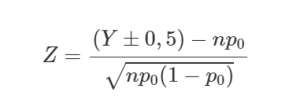

- Quando Y ≤ np utiliza-se Y + 0,5.
- Quando Y ≥ np utiliza-se Y − 0,5.

Hipóteses:

- H0 : p = p0
- H1 : p ≠ p0


- H0 : p = p0
- H1 : p < p0


- H0 : p = p0
- H1 : p > p0

continuar os exemplos
https://operdata.com.br/blog/testes-para-comparacao-de-proporcoes/

## Rates

## Testes de hipótese para uma população

## Referencias

- http://www.leg.ufpr.br/~paulojus/estbas/slides/603_teste_de_hipotese_uma_populacao.pdf
- http://cee.uma.pt/edu/Bioest/teorica/capitulo5.pdf
- https://dfrieds.com/math/z-tests.html
- https://dfrieds.com/math/intro-t-test-terms-and-one-sample-test.html